In [24]:
# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

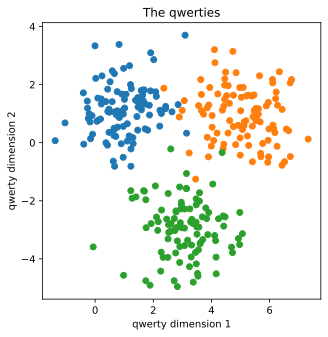

In [25]:
# create data

nPerClust = 100
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 3, -3 ]

# generate data
a = [ A[0] + np.random.randn(nPerClust)*blur, A[1] + np.random.randn(nPerClust)*blur] 
b = [ B[0] + np.random.randn(nPerClust)*blur, B[1] + np.random.randn(nPerClust)*blur] 
c = [ C[0] + np.random.randn(nPerClust)*blur, C[1] + np.random.randn(nPerClust)*blur]
# true labels 
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1)),np.full((nPerClust,1),2)))

#convert to a pytorch tensor
data_np = np.hstack((a,b,c)).T

# convert to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize = (5,5))
plt.scatter(data[np.where(labels==0)[0], 0], data[np.where(labels == 0)[0], 1])
plt.scatter(data[np.where(labels==1)[0], 0], data[np.where(labels == 1)[0], 1])
plt.scatter(data[np.where(labels==2)[0], 0], data[np.where(labels == 2)[0], 1])

plt.title('The qwerties')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [58]:
learningRate = 0.01
# model
ANNmodel = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.Softmax(dim=1)
)

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer 
optimizer = torch.optim.SGD(ANNmodel.parameters(), lr = learningRate)

In [59]:
numepochs = 1000

losses = torch.zeros(numepochs)
ongoingAcc = []
for epochi in range(numepochs):

    # forward pass
    yHat = ANNmodel(data)
    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # compute accuracy
    matches = torch.argmax(yHat, axis = 1) == labels  # booleans
    matchesNumeric = matches.float()                  # converts to numbers
    accuracyPct = 100*torch.mean(matchesNumeric)      # average and x100
    ongoingAcc.append(accuracyPct)

# final forward pass
predictions = ANNmodel(data)
predlabels = torch.argmax(predictions, axis = 1)
totalacc = 100*torch.mean((predlabels == labels).float())

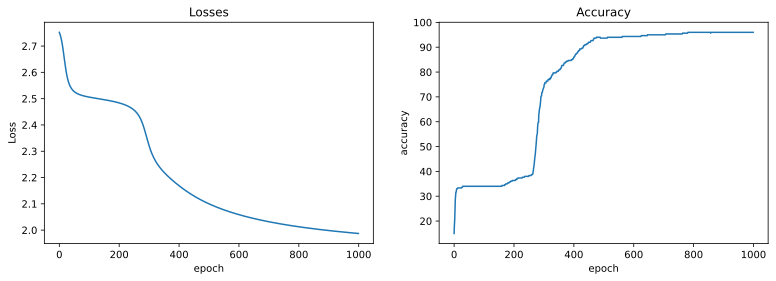

In [60]:
fig, ax = plt.subplots(1,2,figsize = (13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

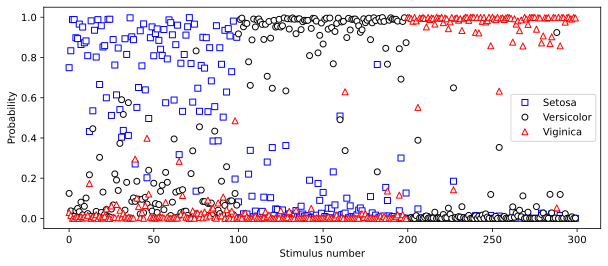

In [61]:

colorshape = [  'bs','ko','r^' ]
# plot the raw model outputs
fig = plt.figure(figsize = (10,4))

for i in range(3):
    plt.plot(yHat[:,i].detach(), colorshape[i], markerfacecolor = 'w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['Setosa','Versicolor', 'Viginica'])
plt.show()